# Introduction to Linear Regression Model

NOTE: ensure to create a copy before you start the assignment.

In [89]:
#import pandas library
import pandas as pd
import numpy as np
import sympy as smpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn.metrics as metrics
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
import statsmodels.graphics as smg
from random import gauss
from sklearn.linear_model import LinearRegression

## Covariance and Correlation

The idea of correlation is the simple idea that variables often change together. For a simple example, cities with more buses tend to have higher populations.

We might observe that, as one variable X increases, so does another Y, OR that as X increases, Y decreases.

The covariance describes how two variables co-vary. Note the similarity in the definition to the definition of ordinary variance:

### Covariance

For two random variables $X$ and $Y$, each with $n$ values:

$\Large\sigma_{XY} = \frac{\Sigma^n_{i = 1}(x_i - \mu_x)(y_i - \mu_y)}{n-1}$ <br/>

In [90]:
#Create our own dataset and divide it into features(x)  and target(y)
x = [1,3,5]
y = [2,9,10]

In [91]:
#checking the data type
print(type(x))
print(type(y))

<class 'list'>
<class 'list'>


In [92]:
#converting the dataset to Dataframe
data = pd.DataFrame({"x":x,"y":y})
data

,x,y
0,1,2
1,3,9
2,5,10


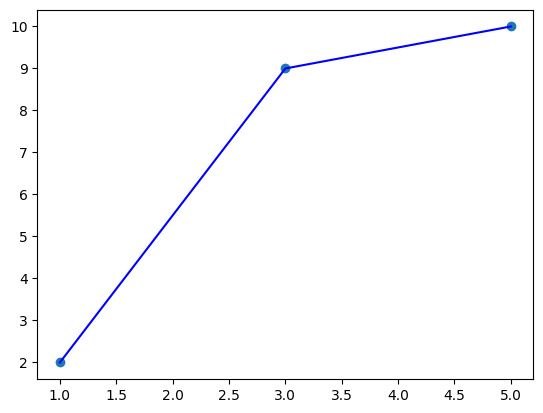

In [93]:
#scatter plot
plt.scatter(x, y)
plt.plot(x,y, color = "blue");

In [94]:
#get the mean for X
x_mean = data.x.mean()
x_mean

3.0

In [95]:
#Get the mean for y
y_mean = data.y.mean()
y_mean

7.0

In [96]:
# Covariance (manual)
#cov(X, Y) = Σ((xᵢ - μₓ)(yᵢ - μᵧ)) /n-1
covxy = ((1-x_mean) * (2- y_mean) + (3-x_mean)* (9-y_mean) + (5 - x_mean)*(10 - y_mean))/3
covxy

5.333333333333333

In [97]:
#Better with numpy
np.cov(x, y, ddof = 0)[0,1]

5.333333333333333

In [98]:
#covariance and var for all the 2 values
np.cov(x, y, ddof = 0)

array([[ 2.66666667,  5.33333333],
       [ 5.33333333, 12.66666667]])

In [99]:
#Variance of x
np.var(x)

2.6666666666666665

Note that the value of the covariance is very much a function of the values of X and Y, which can make interpretation difficult. What is wanted is a standardized scale for covariance, hence: correlation.

### Correlation

Pearson Correlation:<br/>$\Large r_P = \frac{\Sigma^n_{i = 1}(x_i - \mu_x)(y_i - \mu_y)}{\sqrt{\Sigma^n_{i = 1}(x_i - \mu_x)^2\Sigma^n_{i = 1}(y_i -\mu_y)^2}}$

Note that we are simply standardizing the covariance by the standard deviations of X and Y (the $n$'s cancel!).

$\bf{Check}$:

<details><summary>
What happens if X = Y?
</summary>
Then numerator = denominator and the correlation = 1!
</details>
<br/>
We'll always have $-1 \leq r \leq 1$. (This was the point of standardizing by the standard deviations of X and Y.)

A correlation of -1 means that X and Y are perfectly negatively correlated, and a correlation of 1 means that X and Y are perfectly positively correlated.

NumPy also has a correlation method:

In [100]:
#checking correlation
np.corrcoef(x,y)[0,1]

0.917662935482247

# check on whether manual and numpy calculation is same

In [101]:
#checking
np.corrcoef(x, y)[0, 1] == (np.cov(x, y, ddof=0) / (np.std(x) * np.std(y)))[0, 1]

True

And so does SciPy:

In [102]:
#check corr using stat model
stats.pearsonr(x,y)

PearsonRResult(statistic=0.917662935482247, pvalue=0.2601469382930061)

## Statistical Learning Theory

It's important at this point to understand the distinction between dependent and independent variables.

Roughly, the independent variable is what can be directly manipulated and the dependent variable is what cannot be (but is nevertheless of great interest). What matters structurally is simply that we understand the dependent variable to be a function of the independent variable(s).

This is the proper interpretation of a statistical model.

Simple idea: We can model correlation with a line. As one variable changes, so does the other.

This model has two parameters: slope and y-intercept.

Unless there's a perfectly (and suspiciously) linear relationship between our predictor(s) and our target, there will be some sort of error or loss or residual. The best-fit line is constructed by minimizing the sum of the squares of these losses

## Regression Equation

The solution for a simple regression best-fit line is as follows:

- slope: <br/>$\Large m = r_P\frac{\sigma_y}{\sigma_x} = \frac{cov(X, Y)}{var(X)}$

- y-intercept:<br/> $\Large b = \mu_y - m\mu_x$

## Interpretation

The output of the simple linear regression algorithm is a pair of parameters: the slope and the y-intercept of the best-fit line through the data.

## Simple Linear Regression with statsmodels

Let's take a look at how to build a simple linear regression model with statsmodels. The statsmodels package offers a highly descriptive report of the fit of a regression model. Let's generate a simple regression and then analyze the report!

First let's try data that fit a straight line perfectly:

In [103]:
#creating another dataset
x = np.arange(20)
y = 3*x +5

In [104]:
#creating a dataframe
data = pd.DataFrame({"x":x,"y":y})
data

,x,y
0,0,5
1,1,8
2,2,11
3,3,14
4,4,17
5,5,20
6,6,23
7,7,26
8,8,29
9,9,32


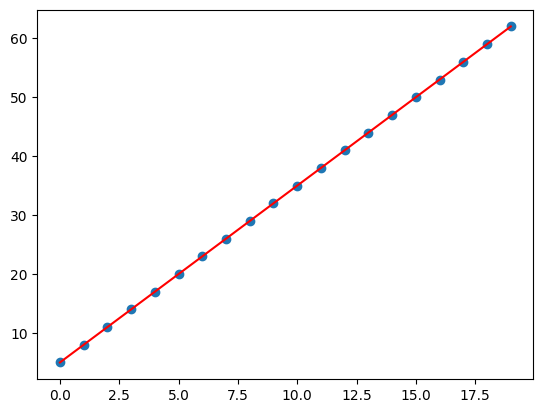

In [105]:
#ploting scatter plot
plt.scatter(x,y)
plt.plot(x,y, color = "r");

In [106]:
#checking coverance
#cov(X, Y) = Σ((xᵢ - μₓ)(yᵢ - μᵧ)) / (n - 1)
#np.cov(x, y, ddof=0)[0]
np.cov(x,y, ddof =0)[0,1]

99.75

In [107]:
#checking correlation
#r = (Σ((xᵢ - μₓ)(yᵢ - μᵧ))) / (√((Σ(xᵢ - μₓ)²) * (Σ(yᵢ - μᵧ)²)))
#stats.pearsonr(x, y)
stats.pearsonr(x,y)

PearsonRResult(statistic=0.9999999999999999, pvalue=0.0)

### Regression Without Error in statsmodels

In [108]:
#creating the model
model = sm.formula.ols(formula = "y~x", data = data).fit()
# (y~X) dependent variable, independent variable


In [109]:
#check model summary
# Train the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.321e+31
Date:                Wed, 23 Jul 2025   Prob (F-statistic):          7.48e-274
Time:                        09:36:57   Log-Likelihood:                 611.51
No. Observations:                  20   AIC:                            -1219.
Df Residuals:                      18   BIC:                            -1217.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0000   5.79e-15   8.64e+14      0.000       5.000       5.000
x              3.0000   5.21e-16   5.76e+15      0.000       3.000       3.000
==============================================================================
Omnibus:                       43.228   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.335
Skew:                           0.201   Prob(JB):                        0.189
Kurtosis:                       1.040   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Regression with Error in statsmodels

In [123]:
#adding noise
x = np.arange(20)
y = np.array([3 * pt + 5 + gauss(mu = 0, sigma = 5) for pt in x])
y

array([ 3.89589978, 10.83494278,  9.25962104, 17.4779451 , 11.02279927,
       18.29136624, 22.31624285, 25.61099117, 35.09595166, 30.0512272 ,
       43.27624739, 36.95453786, 39.5545879 , 40.22693865, 49.68506433,
       49.96725214, 49.58028693, 59.13113124, 65.07069526, 72.81374651])

In [124]:
df2 = pd.DataFrame({"x": x, "y":y})
df2

,x,y
0,0,3.895900
1,1,10.834943
2,2,9.259621
3,3,17.477945
4,4,11.022799
5,5,18.291366
6,6,22.316243
7,7,25.610991
8,8,35.095952
9,9,30.051227


In [125]:
## Calculating the line of best fit
coefficients = np.polyfit(df2['x'], df2['y'], 1)
slope = coefficients[0]
print("Slope",slope)
intercept = coefficients[1]
print("Intercept",intercept)
line_of_best_fit =intercept + slope * df2['x']

Slope 3.24938035652307
Intercept 3.636760377375411


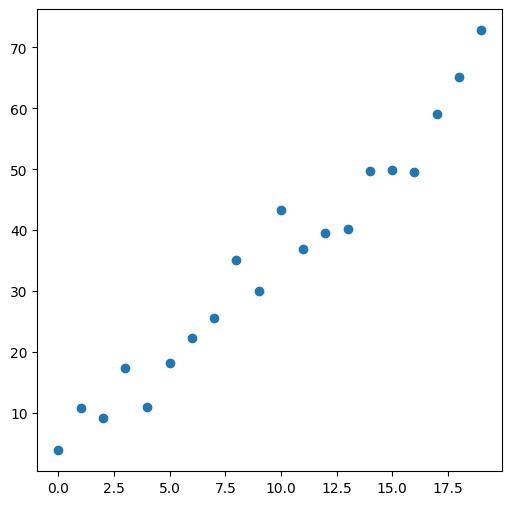

In [126]:
#scatter plot/incoperating line of best_fit
plt.figure(figsize=(6,6))
plt.scatter(x,y);


In [131]:
#calling and creating the model # you can use sm.formula.ols too... model = sm.formula.ols(formula='y~x', data=df2).fit()
model2 = sm.OLS(endog = y, exog = x).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1528.
Date:                Wed, 23 Jul 2025   Prob (F-statistic):                    1.28e-19
Time:                        09:57:57   Log-Likelihood:                         -57.892
No. Observations:                  20   AIC:                                      117.8
Df Residuals:                      19   BIC:                                      118.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.5291      0.090     39.084      0.000       3.340       3.718
==============================================================================
Omnibus:                        0.960   Durbin-Watson:                   1.577
Prob(Omnibus):                  0.619   Jarque-Bera (JB):                0.754
Skew:                           0.086   Prob(JB):                        0.686
Kurtosis:                       2.065   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Fitted Model Attributes and Methods

In [132]:
# t_statistics
model2.tvalues

array([39.08373657])

In [133]:
# p value
# Prob (F-statistic)
model2.pvalues

array([1.28384087e-19])

#####  Adding a constant

In [136]:
#adding constant
# Add a constant term to the predictor variables/feature
x = np.arange(20)
y = np.array([3 * pt + 5 + gauss(mu = 0, sigma = 5) for pt in x])
x_1 = sm.add_constant(x)
x_1

array([[ 1.,  0.],
       [ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.],
       [ 1., 11.],
       [ 1., 12.],
       [ 1., 13.],
       [ 1., 14.],
       [ 1., 15.],
       [ 1., 16.],
       [ 1., 17.],
       [ 1., 18.],
       [ 1., 19.]])

In [137]:
#model with a constant
#model = sm.OLS(y,x_1).fit() 
# you can use . model = sm.formula.ols(formula='y~x', data=df2).fit()

model3 = sm.OLS(endog = y, exog = x_1).fit()
#model3 = sm.OLS(y, x_1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     275.0
Date:                Wed, 23 Jul 2025   Prob (F-statistic):           2.38e-12
Time:                        10:20:03   Log-Likelihood:                -57.425
No. Observations:                  20   AIC:                             118.9
Df Residuals:                      18   BIC:                             120.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4621      1.941      3.329      0.004       2.384      10.540
x1             2.8967      0.175     16.584      0.000       2.530       3.264
==============================================================================
Omnibus:                        1.150   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.563   Jarque-Bera (JB):                0.967
Skew:                           0.488   Prob(JB):                        0.617
Kurtosis:                       2.544   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The `.summary()` method contains lots of helpful information about the model.

In [29]:
#Model summary
#model.summary()

[Regression playground](https://www.desmos.com/calculator/jwquvmikhr)

What are all these statistics!? Let's say a word about them.

## Coefficient of Determination

Very often a data scientist will calculate $R^2$, the *coefficient of determination*, as a measure of how well the model fits the data.

$R^2$ for a model is ultimately a _relational_ notion. It's a measure of goodness of fit _relative_ to a (bad) baseline model. This bad baseline model is simply the horizontal line $y = \mu_Y$, for dependent variable $Y$.

The actual calculation of $R^2$ is: <br/> $\Large R^2\equiv 1-\frac{\Sigma_i(y_i - \hat{y}_i)^2}{\Sigma_i(y_i - \bar{y})^2}$.

$R^2$ is a measure of how much variation in the dependent variable your model explains.

- **F-statistic**: The F-test measures the significance of your model relative to a model in which all coefficients are 0, i.e. relative to a model that says there is no correlation whatever between the predictors and the target. <br/><br/>
- **Log-Likelihood**: The probability in question is the probability of seeing these data points, *given* the model parameter values. The higher this is, the more our data conform to our model and so the better our fit. AIC and BIC are related to the log-likelihood; we'll talk about those later. <br/><br/>
- **coef**: These are the betas as calculated by the least-squares regression. We also have p-values and 95%-confidence intervals. <br/><br/>
- **Omnibus**: This is a test for error normality. The probability is the chance that the errors are normally distributed. <br/><br/>
- **Durbin-Watson**: This is a test for autocorrelation. We'll return to this topic in a future lecture. <br/><br/>
- **Jarque-Bera**: This is another test for error normality. <br/><br/>
- **Cond. No.**: The condition number tests for independence of the predictors. Lower scores are better. When the predictors are *not* independent, we can run into problems of multicollinearity. For more on the condition number, see [here](https://stats.stackexchange.com/questions/168259/how-do-you-interpret-the-condition-number-of-a-correlation-matrix).

# Assumptions of Linear Regression

Linear regression models make the following assumptions about the data and the process that generated them.

[Here](https://www.statisticssolutions.com/assumptions-of-linear-regression/) is a helpful resource on the assumptions of linear regression.

## Linearity
The relationship between the target and predictor is linear. Check this by drawing a scatter plot of your predictor and your target, and see if there is evidence that the relationship might not follow a straight line.

## Independence
**The errors are independent**. In other words: Knowing the error for one point doesn't tell you anything about the error for another.

**How can I check for this?**
- Make a scatter plot of the residuals and target values and look for patterns
- Check the Durbin-Watson score

## Normality
**The errors are normally distributed.** That is, smaller errors are more probable than larger errors, according to the familiar bell curve.

**How can I check for this?**
- Make a histogram of the residuals
- Build a QQ-Plot
- Check the Jarque-Bera or Omnibus p-value (from `statsmodels` output)

## Homoskedasticity

**The errors are homoskedastic.** That is, the errors have the same variance.

(The Greek word $\sigma\kappa\epsilon\delta\acute{\alpha}\nu\nu\upsilon\mu\iota$ means "to scatter".)

**How can I check for this?**
- Make a scatter plot of the residuals and target values and look to see if they are more or less spread out at different places
- Conduct a formal test (e.g. Goldfeld-Quandt)

## Violations of Assumptions

No model is perfect, and your assumptions will never hold perfectly. If the violations of assumptions are severe, you can try adjusting the data so the assumptions will hold, such as by...

- Transforming your data with a non-linear function (e.g. log)
- Only modeling a subset of your data
- Dropping outliers

## Using ScikitLearn

In [ ]:
#load the daste
#data = pd.read_csv("teams.csv")

In [30]:
#check top 5 rows
#data.head()

In [31]:
#checking the number of models won
#data["medals"].value_counts()

In [ ]:
# divide data into x(feature) and y(label/target)
#X = data[["athletes"]]
#y = data[["medals"]]

In [32]:
#import the linear regression model
#from sklearn.linear_model import LinearRegression

#call the model
#model = LinearRegression()

In [33]:
#Train the model
#model.fit(X,y)

In [35]:
#check intercept
#model.intercept_

In [34]:
#check coefficeince
#model.coef_

In [36]:
#check prediction
#model.predict(X)

In [37]:
#Get the accuracy
#model.score(X,y)

### Assignment

Using the same teams dataset. use age instead of athletes feature to predict the number of medals. use both OLS and sklearn approach.

In [12]:
#start using this code
#data2 = pd.read_csv("teams.csv")

In [38]:
#data2.head()